# W4D3 Machine Learning & Linear Regression

 - Instructor: Mark Cassar
 - Original notebook by: Socorro Dominguez

## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning 
2. Supervised Learning
    - `X` and `y`
    - Regression vs. Classification    
    - The golden rule: train/test split
3. Simple Linear Regression
4. Polynomial Regression

## Machine Learning


![img](imgs/CERN5.png)

![img](imgs/cancer.png)

![img](imgs/Curiosity.png)

## Definition of ML / What is ML?

Seen as a subset of AI. ML algorithms build a model based on sample data (training data), in order to make predictions without being explicitly programmed to do so.

A field of study that gives computers the ability to learn without being explicitly programmed.
– Arthur Samuel (1959)

![img](imgs/1_diff.png)

# Types of Machine Learning: Supervised and Unsupervised

## Machine Learning: Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated target (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

<img src='imgs/sup_learning.png' width="700">

## Machine Learning: Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated target)

<img src='imgs/unsup_learning.png' width="630">

# Types of Supervised Learning: Regression and Classification

## Classification vs. Regression

* Classification problems: predicting among two or more categories, also known as classes
    - Predict whether a patient has a liver disease or not
    - Predict whether the letter grade of a student (A, B, C, D or F)
* Regression problem: predicting a continuous (in other words, a number) value
    - Predict house prices
    - Predict someone's age from their photo

## The golden rule
- When you're doing supervised learning, now that you've identified **X** and **y**
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

## The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

## The fundamental tradeoff 

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
| Too Complex|High training score compared to test score| Overfit |
|Too Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

![img](https://miro.medium.com/max/2250/1*_7OPgojau8hkiPUiHoGK_w.png)

## Minimizing approximation error ...
... means that our model generalizes well


$$E_{approx} = (E_{test} - E_{train})$$

- There is generally a "trade-off" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
    - i.e., $E_{approx}\;$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}\;$ tends to get smaller with more data

## The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

## Linear Regression

- Linear regression is one of the most basic and popular ML/statistical techniques.
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable.

## Simple Linear Regression

$$\hat{y} = wx + b$$

$\hat{y}$ = Dependent variable 

$b$ = Constant 

$w$ = Coefficients

$x$ = Independent variable 

## Multiple Linear Regression
- Many $x$'s and $w$'s

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

- The larger the value of $w_i$, the more influence $x_i$ has on the target $\hat{y}$

## Matrix representation

- $\hat{y}$ is the linear function of features $x$ and weights $w$. 

$$\hat{y} = w^Tx + b$$
        
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$$

## Matrix representation for multiple predictions

$$\hat{y} = w^TX + b$$
        

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x^{(1)}_1 & x^{(2)}_1 & \ldots &x^{(n)}_1\\ x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\ \vdots & \vdots & \ldots \\ x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d\end{bmatrix} + b$$

## Let's try it!


Let's start simple and imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

df = pd.read_csv('data/weight-height.csv', usecols = ['Height', 'Weight'])

df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
# normally should split into training and test data first

from sklearn.linear_model import LinearRegression

X_train_sample = df['Height'].values.reshape(-1, 1) # using height as feature (transpose the feature vector)
y_train_sample = df['Weight'] # using weight as target

lr_sample = LinearRegression() # instance of Linear Regression


In [4]:
lr_sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [10]:
lr_sample.predict(X_train_sample)[:5] # prediction based on the w and b found in the linear regression (y = wx + b)

array([219.16147993, 180.07254619, 221.19180859, 202.83140128,
       188.5607277 ])

In [9]:
lr_sample.coef_ # w

array([7.71728764])

In [11]:
lr_sample.intercept_ # b

-350.7371918121362

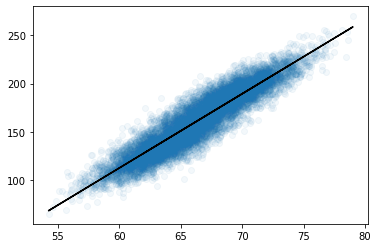

In [8]:
plt.scatter(X_train_sample, y_train_sample, alpha=0.05); # scatter plot
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black') # linear regression line

In [12]:
lr_sample.score(X_train_sample, y_train_sample)

0.8551742120609958

## Coefficients and Intercept

The intuition behind Linear Regression is in the coefficients and intercept.

Some people refer to the coefficients as weights and the intercept as the bias. The 'Weights' and 'Bias' are what is being learned during `fit`.

## Let's load the California Housing Data Set

[Documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [13]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [14]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## The golden rule
- **You need to split your data into train and test**


## So... how do we split?
- Most common way is to use `train_test_split` in `sklearn`
- Shuffles the data first and then splits it
- 80/20, 75/25, 70/30 are common splits

## Splitting out our X and y
- In this case, we are working with a regression problem. Could you say why?
- What are the features? 
- What is the target?

In [15]:
X = pd.DataFrame(california.data, columns = california.feature_names)
y = pd.DataFrame(california.target, columns=california.target_names)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train.shape

(16512, 8)

In [18]:
X_test.shape

(4128, 8)

In [19]:
X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])

0.8

In [20]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit calculate the mean and standard deviation of each column, and transform applies the transformation based on calculated means and standard deviations

In [23]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe() # standard scalar makes the mean 0 and the standard deviation 1 (computing the z score)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,2.194627e-17,1.452327e-18,-5.976055e-17,-8.114203e-17,-7.530583e-17,-3.657712e-18,-2.232710e-15,1.712670e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.761558e+00,-2.194524e+00,-1.766616e+00,-1.506323e+00,-1.243452e+00,-2.398620e-01,-1.442764e+00,-2.387301e+00
25%,-6.853751e-01,-8.455794e-01,-3.852367e-01,-1.826857e-01,-5.585730e-01,-6.146149e-02,-7.971185e-01,-1.109454e+00
50%,-1.808423e-01,2.726683e-02,-8.166807e-02,-9.921501e-02,-2.235969e-01,-2.114142e-02,-6.427249e-01,5.377718e-01
75%,4.562502e-01,6.620641e-01,2.355839e-01,-9.190159e-05,2.624038e-01,2.650105e-02,9.760678e-01,7.823598e-01
max,5.829836e+00,1.852309e+00,5.252725e+01,6.482260e+01,3.008450e+01,1.273890e+02,2.955112e+00,2.624257e+00


## Training the model

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
lr_coeffs = lr.coef_
lr_coeffs

array([[ 0.83195757,  0.11896699, -0.27367165,  0.31451072, -0.00091772,
        -0.04692259, -0.89343616, -0.86162275]])

In [27]:
lr_intercept = lr.intercept_
lr_intercept

array([2.06238989])

In [29]:
words_coeffs_df = pd.DataFrame(data = lr_coeffs.T, index = X_train.columns, columns=['Coefficients'])
words_coeffs_df # positive means increase the feature with increase the value of the target

,Coefficients
MedInc,0.831958
HouseAge,0.118967
AveRooms,-0.273672
AveBedrms,0.314511
Population,-0.000918
AveOccup,-0.046923
Latitude,-0.893436
Longitude,-0.861623


Let’s try to make some sense of it here!

We can use these coefficients to interpret our model. They show us how much each of these features affects our model’s prediction.

**IMPORTANT**
In linear models:

* if the coefficient is +, then if the feature value goes UP the predicted value goes UP
* if the coefficient is -, then if the feature values goes UP the predicted value goes DOWN
* if the coefficient is 0, the feature is not used in making a prediction

## Feature Importances

In [31]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.1/9.1 MB 845.8 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 894.4 kB/s eta 0:00:00


In [32]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

In [33]:
results.params

x1    0.831958
x2    0.118967
x3   -0.273672
x4    0.314511
x5   -0.000918
x6   -0.046923
x7   -0.893436
x8   -0.861623
dtype: float64

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.144
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              348.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                        0.00
Time:                        12:33:33   Log-Likelihood:                         -36308.
No. Observations:               16512   AIC:                                  7.263e+04
Df Residuals:                   16504   BIC:                                  7.269e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8540      0.027     31.160      0.000       0.800       0.908
x2             0.1216      0.019      6.421      0.000       0.084       0.159
x3            -0.3086      0.048     -6.474      0.000      -0.402      -0.215
x4             0.3510      0.043      8.083      0.000       0.266       0.436
x5            -0.0067      0.018     -0.370      0.712      -0.042       0.029
x6            -0.0404      0.017     -2.370      0.018      -0.074      -0.007
x7            -0.8771      0.052    -16.974      0.000      -0.978      -0.776
x8            -0.8508      0.051    -16.770      0.000      -0.950      -0.751
==============================================================================
Omnibus:                     3457.236   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9133.111
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         6.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
!pip install rfpimp

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=c80fe190d425fde66c7e3a61b14998f7e0f214f296ed2b774c433c4933da331d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d9\f2\53\6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [36]:
from rfpimp import * # mixes up the values in each column and measures how much it changes the R2 (e.g. how much randomizing the column values affects the predictive power of the model - if the feature is very predictive, randomizing the values will reduce the predictive power of the model)
import warnings
warnings.filterwarnings('ignore')

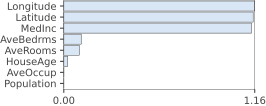

In [23]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
I = importances(lr, X_train_scaled_df, y_train)
plot_importances(I)

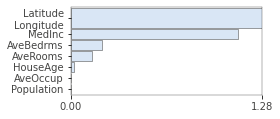

In [25]:
def showimp(model, X, y):
    features = list(X.columns)
    features.remove('Latitude')
    features.remove('Longitude')
    features += [['Latitude','Longitude']]

    I = importances(model, X, y, features=features)
    plot_importances(I)
    
showimp(lr, X_train_scaled_df, y_train)

## Predicting

In [38]:
X_test_scaled = scaler.transform(X_test) # if you scaled the training data, must also scale the test data so the training and test data looks similar.  must use same means / standard deviations calculated in training data (aka same scalar). DON"T WANT TO RE-FIT, just TRANSFORM
X_test_scaled[:5]

array([[-0.66767958, -0.13143248, -0.47191444, -0.03477584,  2.8570417 ,
         0.00793858, -0.80179706,  0.72246072],
       [ 0.25940017, -0.21078214,  0.33189987, -0.2007602 , -0.17398706,
         0.02614607, -1.43340695,  1.23160313],
       [-0.99169678,  0.50336477, -0.7436298 , -0.15444476,  1.8306012 ,
         0.26670204, -0.67079649,  0.20333513],
       [-0.72066155,  0.02726683,  0.25627791,  0.25539049, -0.35135317,
         0.02234227,  0.19942157, -0.6102944 ],
       [-1.407333  ,  0.58271443, -0.04196139,  0.45994962, -0.7482318 ,
         0.05529244,  0.98542499, -1.30911731]])

In [39]:
lr.predict(X_test_scaled)

array([[1.70035633],
       [2.31756405],
       [1.86208123],
       ...,
       [4.21204165],
       [0.62213912],
       [0.25849851]])

In [29]:
y_test.values

array([[2.724  ],
       [1.5    ],
       [0.772  ],
       ...,
       [5.00001],
       [1.5    ],
       [2.482  ]])

## Prediction By Hand

In [40]:
lr.coef_

array([[ 0.83195757,  0.11896699, -0.27367165,  0.31451072, -0.00091772,
        -0.04692259, -0.89343616, -0.86162275]])

In [41]:
lr.intercept_

array([2.06238989])

$$\hat{y} = w_1x_1 + w_2x_2 + ... + w_8x_8 + b$$

In [32]:
print(X_test_scaled[0])
(lr.coef_ * X_test_scaled[0]).sum(axis=1) + lr.intercept_ # dot product between coefficients and test data


[-0.32357027  1.53841643 -0.11767479  0.02782637 -0.66811789 -0.05368405
 -0.71057333  0.75737545]


array([2.0003309])

## Results interpretation

- Weights (coef_)
- Bias (intercept_)

- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model - how much better or worse your model than a model that just predicts the average (will increase every time you add a new feature, even if it doesn't help you). Ranges from negative infinity to 1. 1 = your model predicts perfectly, 0 means it predicts the same as the average, negative means it's worse than just predicting the average
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model (will only increase if feature is actually helping predict)

**What does that mean?**

* $R^2$ is a measure of fit.  
  
* It indicates how much variation of a dependent variable is explained by the independent variables.
  
* An R-squared of 100% means that $y$ is completely explained by the independent variables.


$R^2 = 1 - \frac{Unexplained Variation}{TotalVariation}$

$R^2 = 1 - \frac{RSS}{TSS}$

$R^2	=	$   coefficient of determination    
$RSS	=	$  sum of squares of residuals   
$$RSS =\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}$$   
$TSS	=	$   total sum of squares   
$$TSS=\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$$
$\bar{y}$ = mean value

Thus, 

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}
$$

In [33]:
lr.score(X_test_scaled, y_test)

0.5966122456923133

## Understanding $R^2$

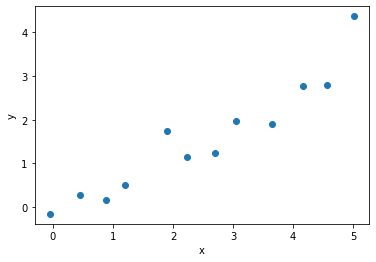

In [34]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [35]:
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")
    
    yhat = lr.predict(x[:,None])

    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)    

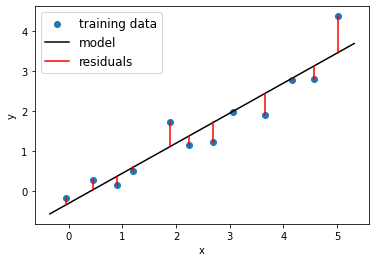

In [36]:
lr = LinearRegression()
lr.fit(X, y)
make_plot(lr, x, y)

## Polynomial regression 

### Non-linear regression motivation
- Linear regression might seem rather limited. 
- What if the true relationship between the target and the features is non-linear? 


**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

In [42]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

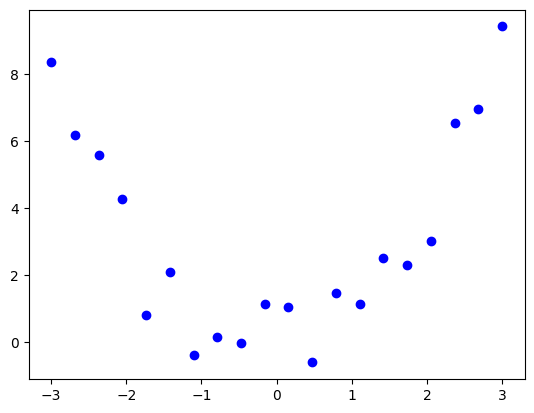

In [43]:
plt.scatter(X, y, color='blue');

## Fitting a linear regression line

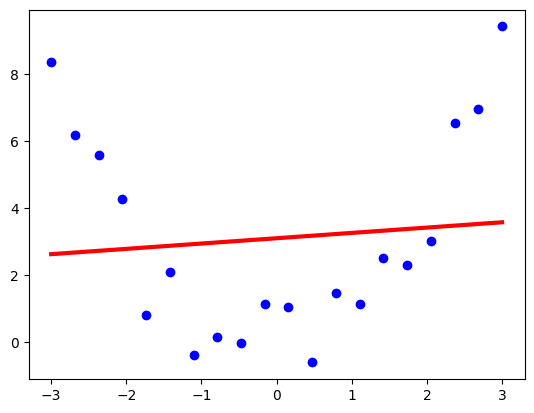

In [44]:
lr = LinearRegression()

lr.fit(X, y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)

## Using polynomial features

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)

X_deg = poly_feats.fit_transform(X)

X_poly_feat_names = poly_feats.get_feature_names_out(['x'+ str(i) for i in range(1,deg)])

df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y


In [47]:
df_poly.head()

,1,x1,x1^2,y
0,1.0,-3.000000,9.000000,8.366389
1,1.0,-2.684211,7.204986,6.180646
2,1.0,-2.368421,5.609418,5.584786
3,1.0,-2.052632,4.213296,4.276810
4,1.0,-1.736842,3.016620,0.812662


## Fitting polynomial features


What sklearn does is - If you substitute $x^2$ as another variable such as `m`, then the equation now is:

`y=w*m + b`  

The relation between `y` and `m` is linear but it is not linear between `x` and `y`. 

Because of this "technically", it is linear regression just the variables between which it happens is $x^2$ (`m`) and `y` and not `x` and `y`.

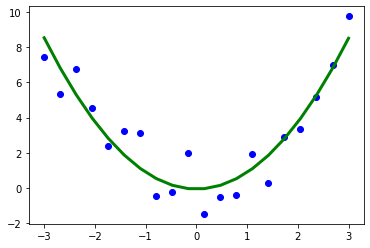

In [43]:
lr_poly = LinearRegression()

lr_poly.fit(X_deg, y)

preds = lr_poly.predict(X_deg)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

In [44]:
lr_poly.coef_

array([[ 0.        , -0.00438031,  0.95496601]])

In [45]:
lr_poly.intercept_

array([-0.06860301])

In [48]:
#  this is basically like adding extra features, where the extra features are x raised to another power